# Cuaderno para pruebas de las redes en NetworkX

### Modelo de red aleatoria de Erdős-Rényi

In [1]:
# Modelo de red aleatoria de Erdős-Rényi
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt

n = 100   # Número de nodos
p = 0.01  # Probabilidad de enlace entre nodos

# Crear la red usando el modelo G(n, p)
G = nx.erdos_renyi_graph(n, p)

# Opcional: Visualizar o analizar la red
print("Número de nodos:", G.number_of_nodes())
print("Número de enlaces:", G.number_of_edges())

# Visualizar la red con pyvis

# Crear un objeto Network con PyVis
net = Network(notebook=True, height='100vh', width="100%", select_menu=True, filter_menu=True)

# Convertir de networkx a PyVis
net.from_nx(G)

# Calcular el grado de cada nodo
degree_dict = dict(G.degree())

# Normalizar los tamaños de los nodos
max_degree = max(degree_dict.values())
min_size = 10
max_size = 30

for node in net.nodes:
    node_id = node['id']
    degree = degree_dict[node_id]
    
    # Calcular el tamaño proporcional
    size = min_size + (degree / max_degree) * (max_size - min_size)
    
    node['size'] = size
    node['color'] = '#9FA3D5'
    node['title'] = f"Grado: {degree}"  # Información al pasar el cursor

# Cambiar el color de los enlaces y su anchura
for edge in net.edges:
    edge['color'] = '#3B4285'
    edge['width'] = 2

# Mostrar los botones de configuración
net.show_buttons()

# Mostrar la red
net.show('erdos_renyi_graph.html')

Número de nodos: 100
Número de enlaces: 47
erdos_renyi_graph.html


### Modelo de Barabási-Albert (simple)

In [9]:
# Se crearán diferentes redes Barabási-Albert mediante la librería de NetworkX y se visualizarán mediante pyvis

import networkx as nx
from pyvis.network import Network

# Crear la red Barabási-Albert
n = 100  # Número de nodos
m = 2    # Número de enlaces a añadir desde un nuevo nodo a nodos existentes

# Crear la red usando el modelo Barabási-Albert
G_ba = nx.barabasi_albert_graph(n, m)

# Crear un objeto Network con PyVis
net_ba = Network(notebook=True, height='100vh', width="100%", select_menu=False, filter_menu=False)

# Convertir de networkx a PyVis
net_ba.from_nx(G_ba)

# Calcular el grado de cada nodo
degree_dict = dict(G_ba.degree())

# Normalizar los tamaños de los nodos
max_degree = max(degree_dict.values())
min_size = 10
max_size = 30

for node in net_ba.nodes:
    node_id = node['id']
    degree = degree_dict[node_id]
    
    # Calcular el tamaño proporcional
    size = min_size + (degree / max_degree) * (max_size - min_size)
    
    node['size'] = size
    node['color'] = '#9FA3D5'
    node['title'] = f"Grado: {degree}"  # Información al pasar el cursor

# Cambiar el color de los enlaces y su anchura
for edge in net_ba.edges:
    edge['color'] = '#3B4285'
    edge['width'] = 2

# Mostrar los botones de configuración
net_ba.show_buttons()

# Mostrar la red
net_ba.show('barabási-albert.html')

barabási-albert.html


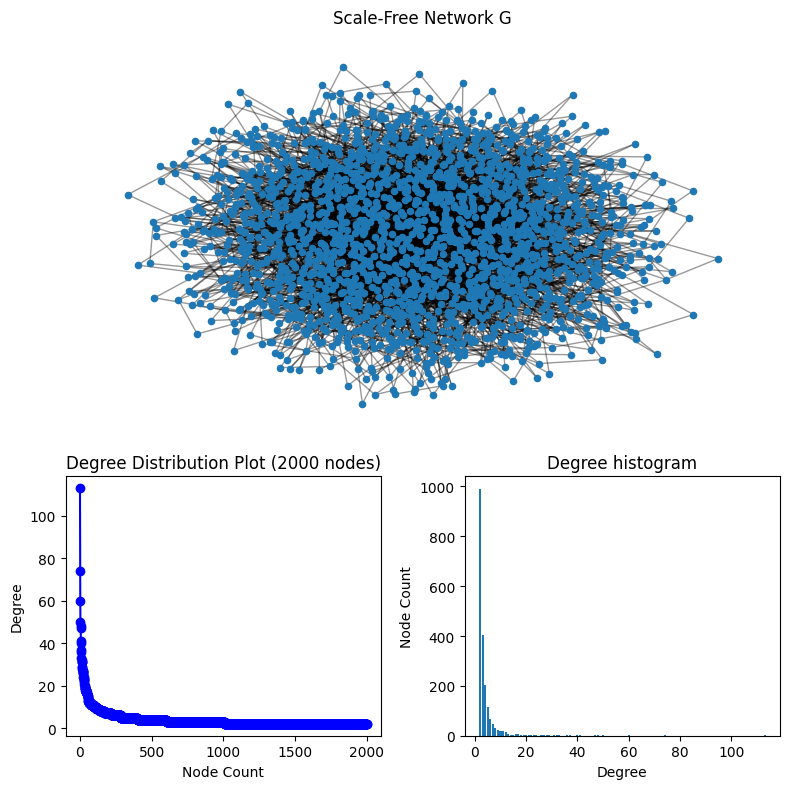

In [13]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt

G = nx.barabasi_albert_graph(n = 2000, m = 2, seed=10374196, initial_graph = None)
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
fig = plt.figure("Degree of a random graph", figsize=(8, 8))

# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Scale-Free Network G")
ax0.set_axis_off()
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Distribution Plot (2000 nodes)")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Node Count")
ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Node Count")
fig.tight_layout()
plt.show()